# Plan

1. Exploratory Data Analysis
2. Hypothesis testing
3. ML model that predicts price to distinguish good/bad deals

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df = pd.read_csv('hemnet_df.csv')

In [17]:
new_column_order = [
    'date_sale',
    'kommun',
    'neighbourhood',
    'street_name',
    'house_number',
    'rooms',
    'size',
    'elevator',
    'balcony',
    'percentage_increase',
    'square_meter_price',
    'selling_price'
]

df = df[new_column_order]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89386 entries, 0 to 89385
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_sale            89386 non-null  object 
 1   kommun               89382 non-null  object 
 2   neighbourhood        89386 non-null  object 
 3   street_name          89386 non-null  object 
 4   house_number         89386 non-null  object 
 5   rooms                89386 non-null  float64
 6   size                 89386 non-null  float64
 7   elevator             89386 non-null  bool   
 8   balcony              89386 non-null  bool   
 9   percentage_increase  89386 non-null  float64
 10  square_meter_price   89386 non-null  float64
 11  selling_price        89386 non-null  int64  
dtypes: bool(2), float64(4), int64(1), object(5)
memory usage: 7.0+ MB


# Checking Data Integrity

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,89386.0,2.257138e+00,9.784703e-01,1.0,2.0,2.0,3.000,9.0
size,89386.0,5.812783e+01,2.732282e+01,3.0,38.0,53.0,73.175,405.0
percentage_increase,89386.0,1.575778e+03,4.360680e+05,-100.0,4.0,10.0,17.000,129999900.0
square_meter_price,89386.0,9.105369e+04,2.201707e+04,0.0,76250.0,89744.0,104138.000,1566667.0
selling_price,89386.0,5.206226e+06,2.938567e+06,8.0,3320000.0,4400000.0,6220000.000,67000000.0


### Looks like there are some outliers for percentage_increase, square_meter_price & selling_price

I will remove outliers that seem implausible when it comes to size and selling_price. I will also remove plausible sales above 20mkr. Whilst these are likely true, I'm not interested in these particular sales and want to avoid them skewing my data too much.

In [37]:
df.query('selling_price > 20_000_000')

,date_sale,kommun,neighbourhood,street_name,house_number,rooms,size,elevator,balcony,percentage_increase,square_meter_price,selling_price
15556,2015-08-17,Stockholms kommun,Östermalm,Nybrogatan,81,4.0,165.0,False,False,0.0,140000.0,23100000
16386,2015-09-17,Stockholms kommun,Östermalm,Nybrogatan,83,4.0,144.0,False,False,0.0,140278.0,20200000
16809,2015-10-02,Stockholms kommun,Östermalm,Grevgatan,13,6.0,196.0,False,False,12.0,105612.0,20700000
17007,2015-10-12,Stockholms kommun,Östermalm,Karlavägen,83,9.0,309.0,False,False,-5.0,106796.0,33000000
17107,2015-10-15,Stockholms kommun,Östermalm,Nybrogatan,63,9.0,308.0,False,False,6.0,116883.0,36000000
...,...,...,...,...,...,...,...,...,...,...,...,...
88390,2023-12-12,Stockholms kommun,Södermalm,Högbergsgatan,59,4.0,153.0,True,True,0.0,149346.0,22850000
88422,2023-12-13,Stockholms kommun,Vasastan,Torsplan,10,6.0,199.0,True,False,0.0,201005.0,40000000
88453,2023-12-15,Stockholms kommun,Östermalm,Nybrogatan,57A,5.0,146.0,True,True,-6.0,150685.0,22000000
88969,2024-01-23,Stockholms kommun,Östermalm,Humlegårdsgatan,11,5.0,145.0,True,True,2.0,196552.0,28500000


In [54]:
df = df.query('selling_price <= 20_000_000')
df = df.query('selling_price >= 1_000_000')
df = df.query('percentage_increase <= 72.0')
df = df.query('percentage_increase >= -50.0')
df = df.query('square_meter_price >= 25_000')
df = df.query('size >= 10')

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,89010.0,2.244714e+00,9.586382e-01,1.0,2.0,2.0,3.00,9.0
size,89010.0,5.763020e+01,2.611830e+01,10.0,38.0,52.5,73.00,285.0
percentage_increase,89010.0,1.108879e+01,9.656575e+00,-49.0,4.0,10.0,17.00,72.0
square_meter_price,89010.0,9.080631e+04,2.106911e+04,25714.0,76190.0,89655.0,103918.25,258333.0
selling_price,89010.0,5.121232e+06,2.586317e+06,1180000.0,3310000.0,4380000.0,6200000.00,20000000.0


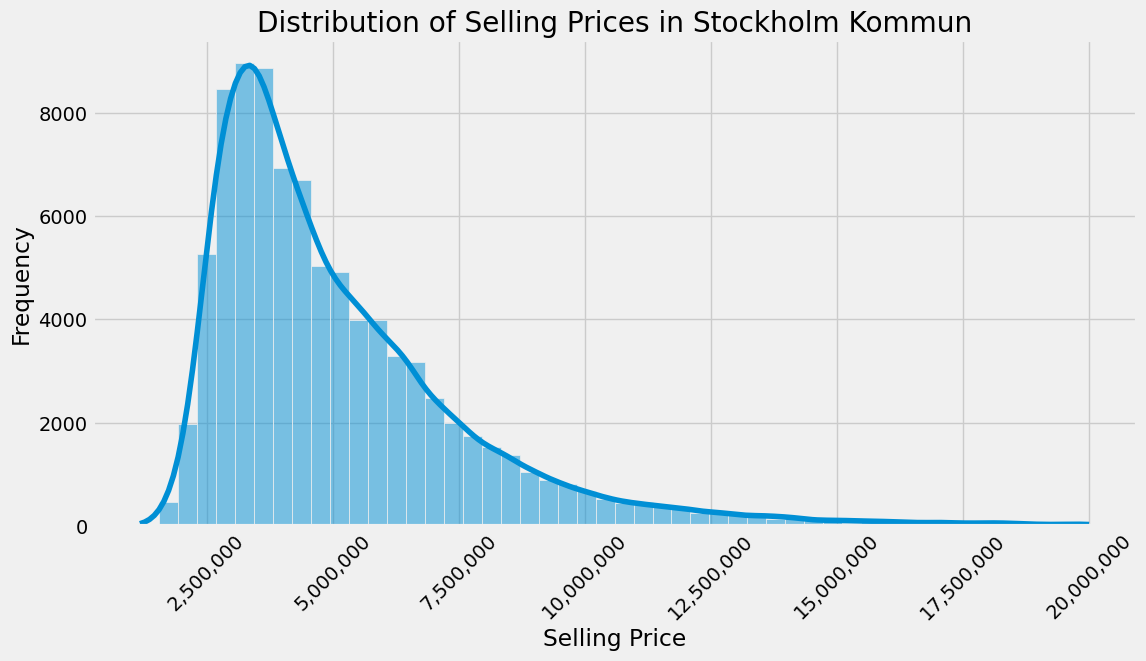

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='selling_price', kde=True, bins=50)
plt.title('Distribution of Selling Prices in Stockholm Kommun')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()


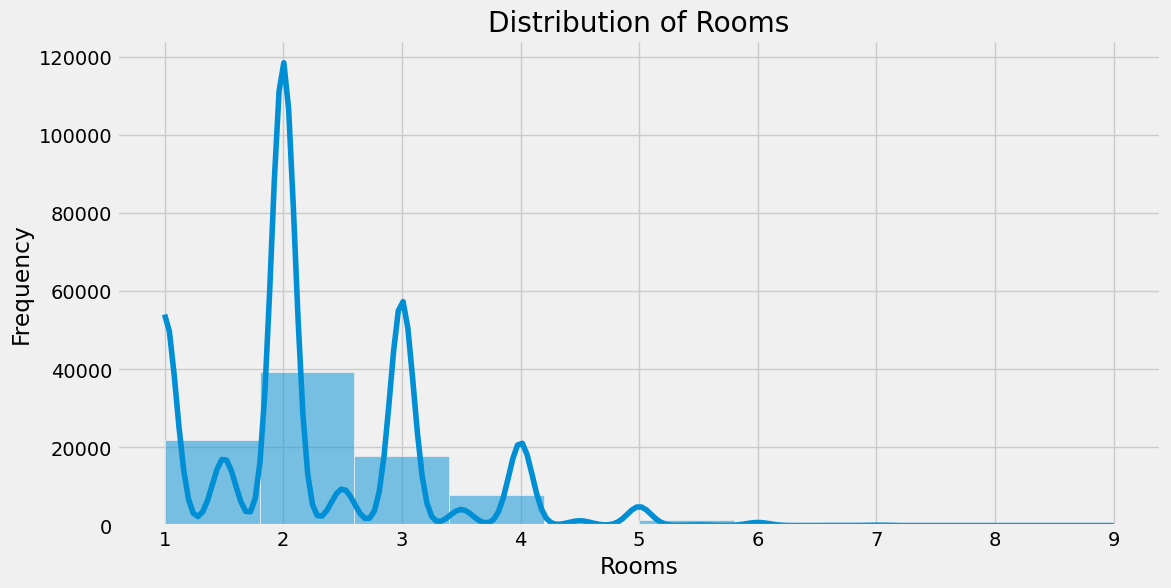

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='rooms', kde=True, bins=10)
plt.title('Distribution of Rooms')
plt.xlabel('Rooms')
plt.ylabel('Frequency')

plt.show()


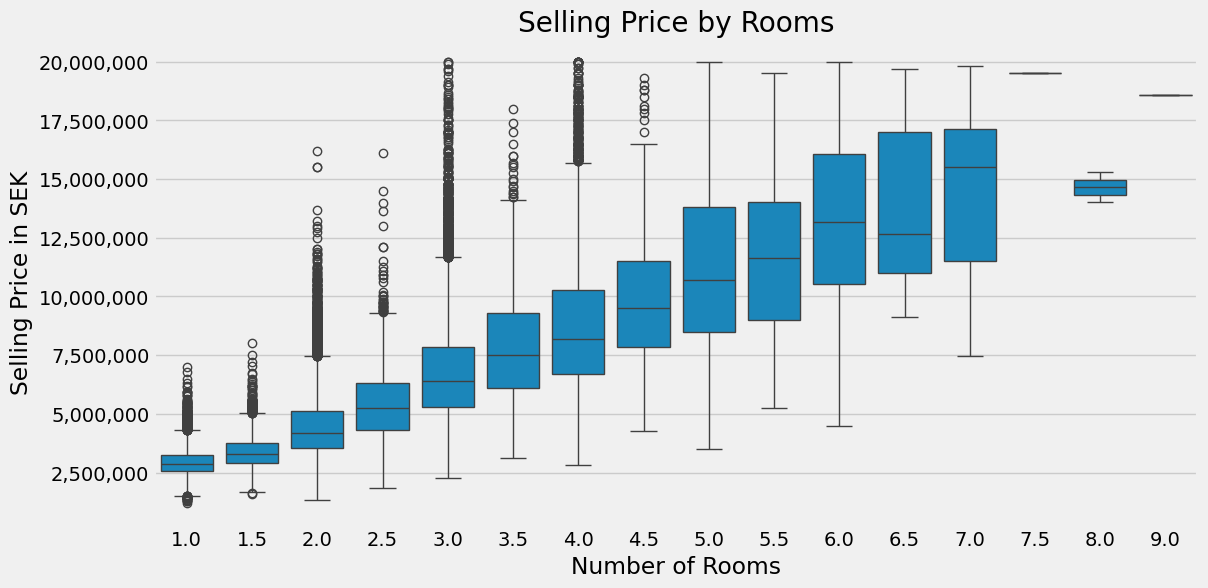

In [77]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='rooms', y='selling_price')
ax.set_title('Selling Price by Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Selling Price in SEK')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

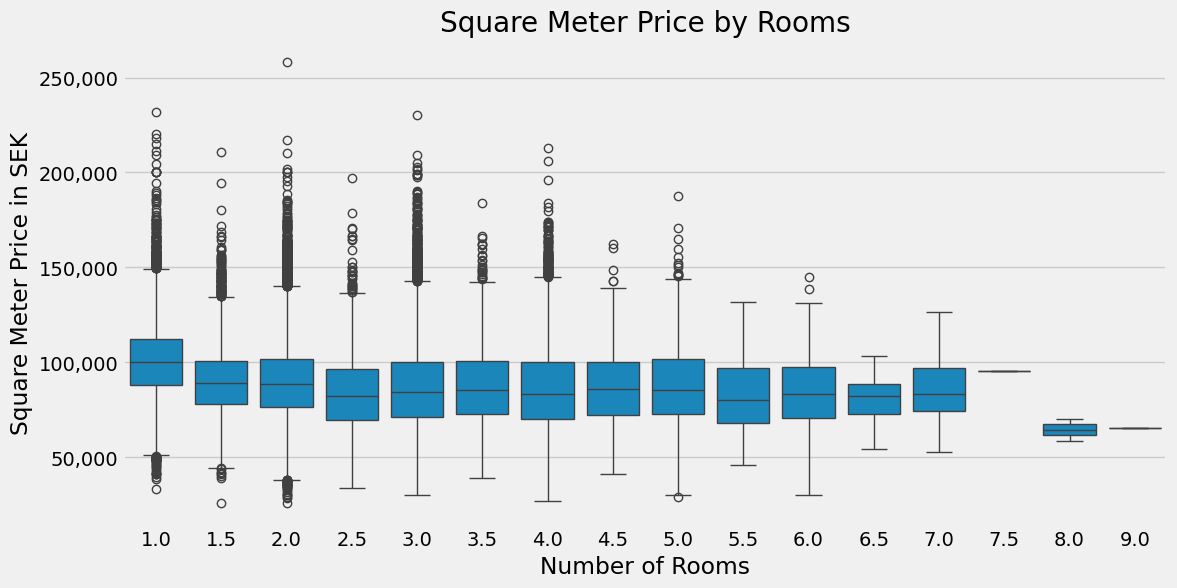

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='rooms', y='square_meter_price')
ax.set_title('Square Meter Price by Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Square Meter Price in SEK')

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

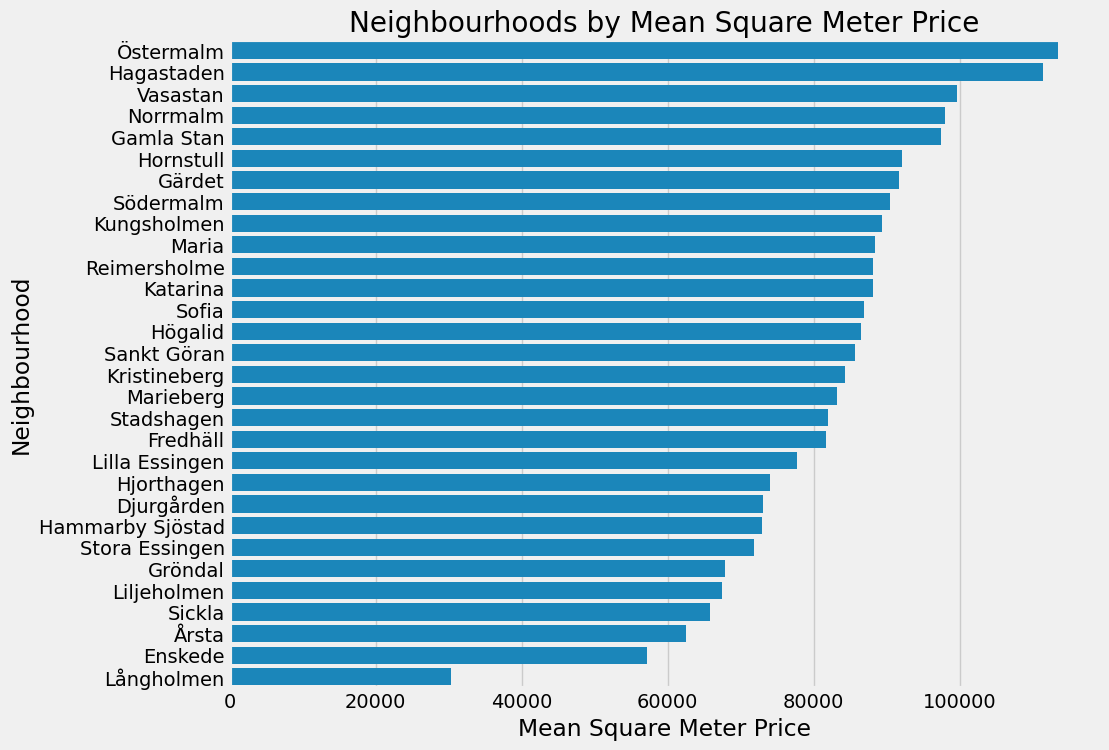

In [87]:
neighbourhood_prices = df.groupby('neighbourhood')['square_meter_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=neighbourhood_prices.values, y=neighbourhood_prices.index)
plt.title('Neighbourhoods by Mean Square Meter Price')
plt.xlabel('Mean Square Meter Price')
plt.ylabel('Neighbourhood')
plt.show()

### Creating some date features

In [93]:
df['date_sale'] = pd.to_datetime(df['date_sale'])
df['year'] = df['date_sale'].dt.year
df['quarter'] = df['date_sale'].dt.quarter
df['month'] = df['date_sale'].dt.month_name()

In [94]:
sales_per_year = df['year'].value_counts().sort_index()

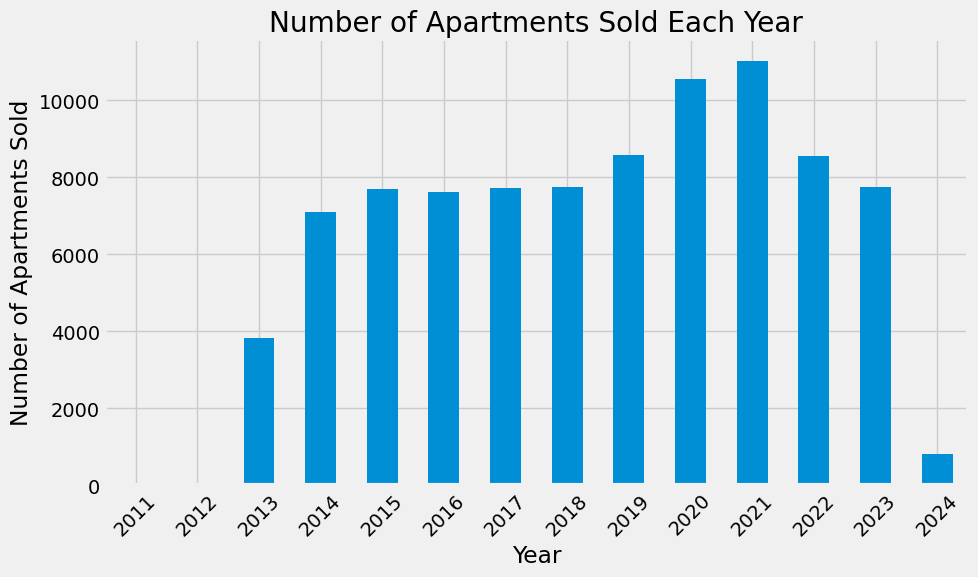

In [95]:
plt.figure(figsize=(10, 6))
sales_per_year.plot(kind='bar')
plt.title('Number of Apartments Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Apartments Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

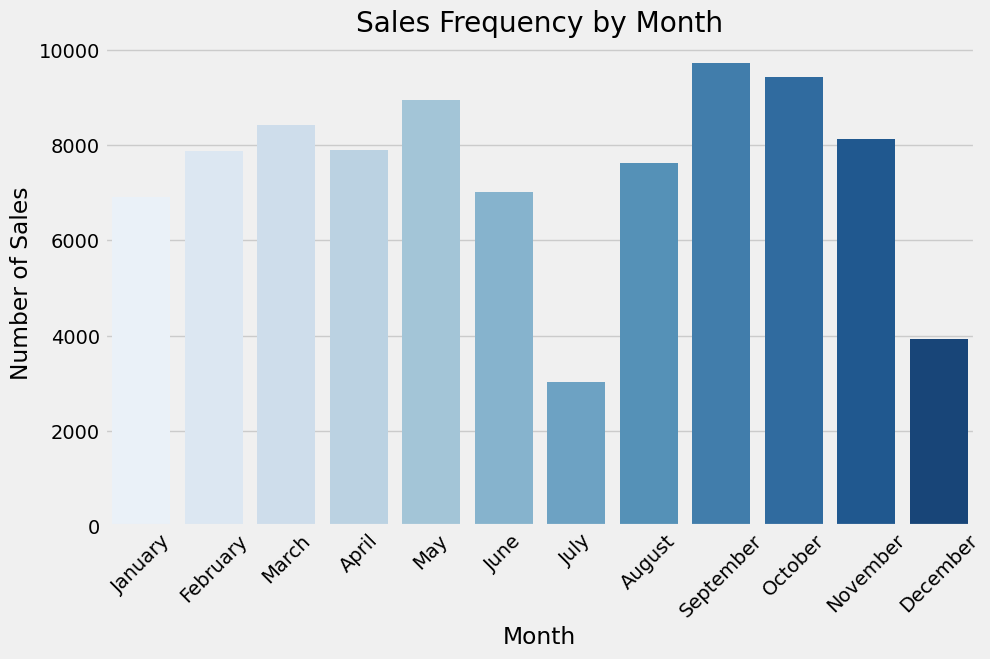

In [103]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month', order=months_order, palette='Blues')
plt.title('Sales Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

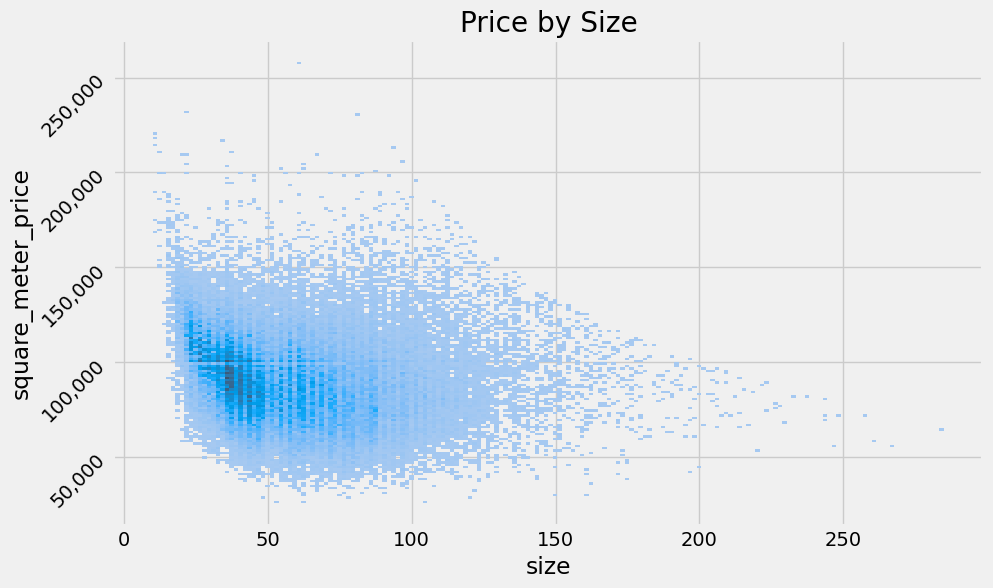

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='size', y='square_meter_price')
ax.set_title('Price by Size')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.yticks(rotation=45)
plt.show()

In [112]:
df.columns

Index(['date_sale', 'kommun', 'neighbourhood', 'street_name', 'house_number',
       'rooms', 'size', 'elevator', 'balcony', 'percentage_increase',
       'square_meter_price', 'selling_price', 'year', 'quarter', 'month'],
      dtype='object')

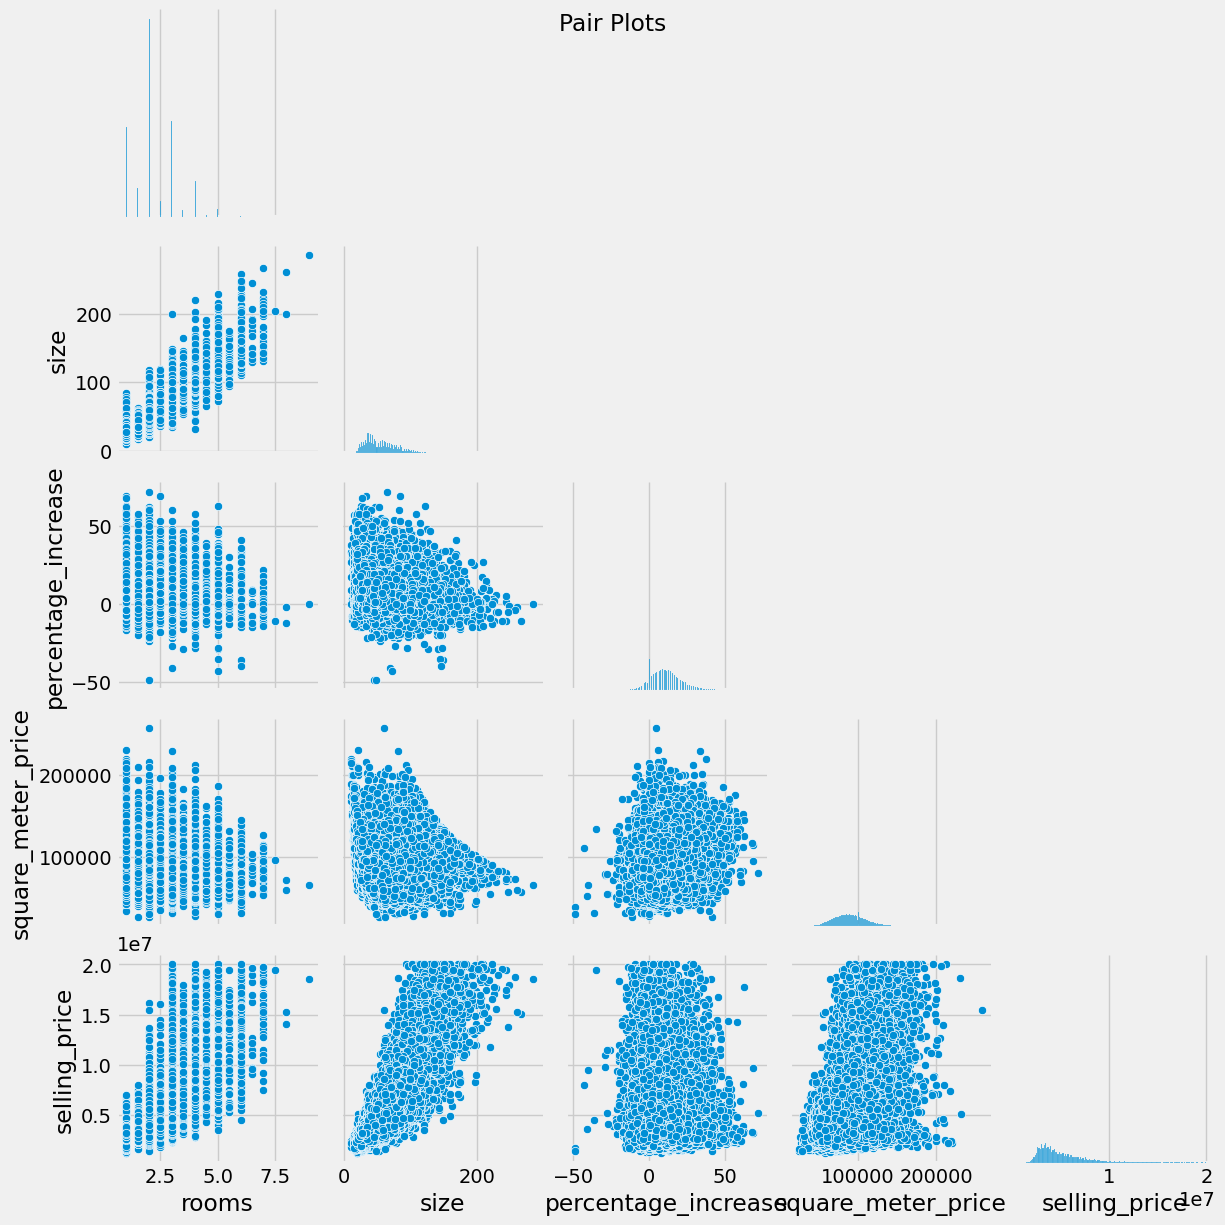

In [116]:
sns.pairplot(df, vars=['rooms', 'size', 'percentage_increase', 'square_meter_price', 'selling_price'], corner=True)
plt.suptitle("Pair Plots")
plt.tight_layout
plt.show()